Do some imports

In [1]:
#essential imports
%matplotlib inline 
from __future__ import division

In [2]:
#Utilities imports
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
#Specific usage imports
from openfisca_core import rates
from openfisca_core.tools import get_trace_tool_link
import openfisca_france


Initialize the tax and benefit system of France

In [5]:
tax_benefit_system = openfisca_france.FranceTaxBenefitSystem()

Create a scenario

In [6]:
def make_single_with_child_scenario(nombre_enfants = 0, year = None, tax_benefit_system = tax_benefit_system,
                                    axes_variable = 'salaire_de_base',  ax_variable_max = 300000, ax_variable_min = 0,
                                    count = 20000):
    enfant = [dict(
        age = 12,
        )]
    enfants = enfant * nombre_enfants
    scenario = tax_benefit_system.new_scenario().init_single_entity(
        axes = [[
            dict(
                count = count,
                min = ax_variable_min,
                max = ax_variable_max,
                name = axes_variable,
                period = year-2,
                ),
            dict(
                count = count,
                min = ax_variable_min,
                max = ax_variable_max,
                name = axes_variable,
                period = year-1,
                ),
            dict(
                count = count,
                min = ax_variable_min,
                max = ax_variable_max,
                name = axes_variable,
                period = year,
                ),
            ]],
        period = year,
        parent1 = dict(
            age = 40,
            ppe_du_sa = 6020,
            ),
        enfants = enfants,
        menage = dict(
            loyer = 1000,
            #statut_occupation = 4,
            ),
        )
    return scenario


In [19]:
simulation = make_single_with_child_scenario(year = 2016).new_simulation()

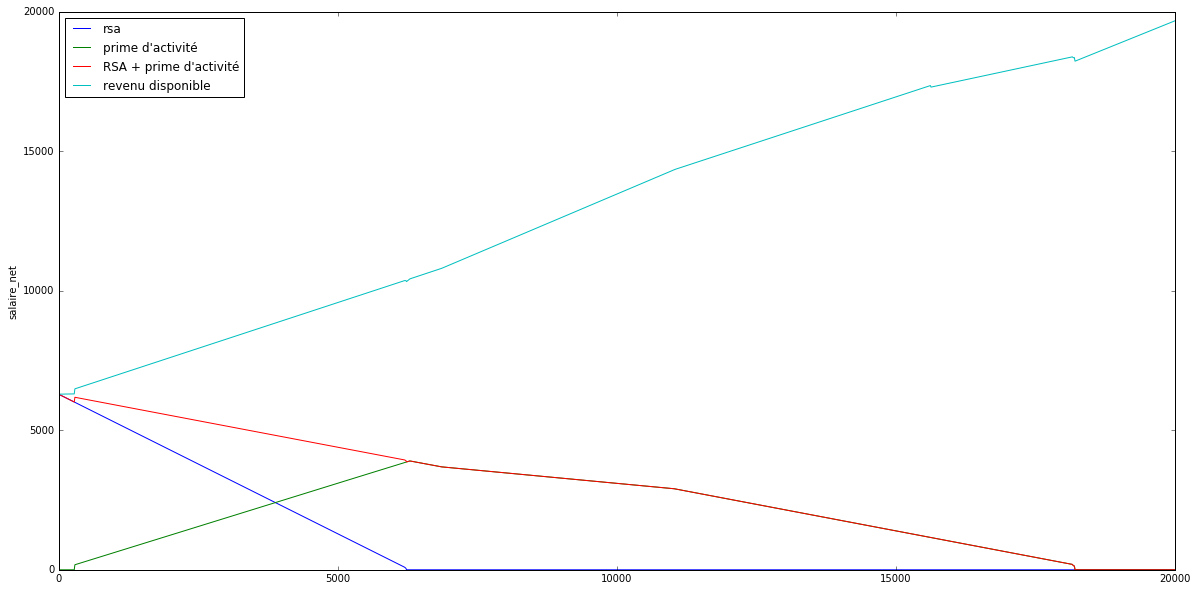

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(
         simulation.calculate_add("salaire_net"),
         simulation.calculate_add("rsa"), label = "rsa"
        )
ax.plot(simulation.calculate_add("salaire_net"),
         simulation.calculate_add("ppa"), label = u"prime d'activité"
        )

ax.plot(simulation.calculate_add("salaire_net"),
         simulation.calculate_add("rsa") + simulation.calculate_add("ppa"),
         label = u"RSA + prime d'activité"
        )

ax.plot(simulation.calculate_add("salaire_net"),simulation.calculate_add("revdisp"), label = "revenu disponible")
ax.set_xlim(0,20000)
ax.set_ylim(0,20000)
ax.legend(loc = 2); ax.set_ylabel('euros'); ax.set_ylabel('salaire_net');

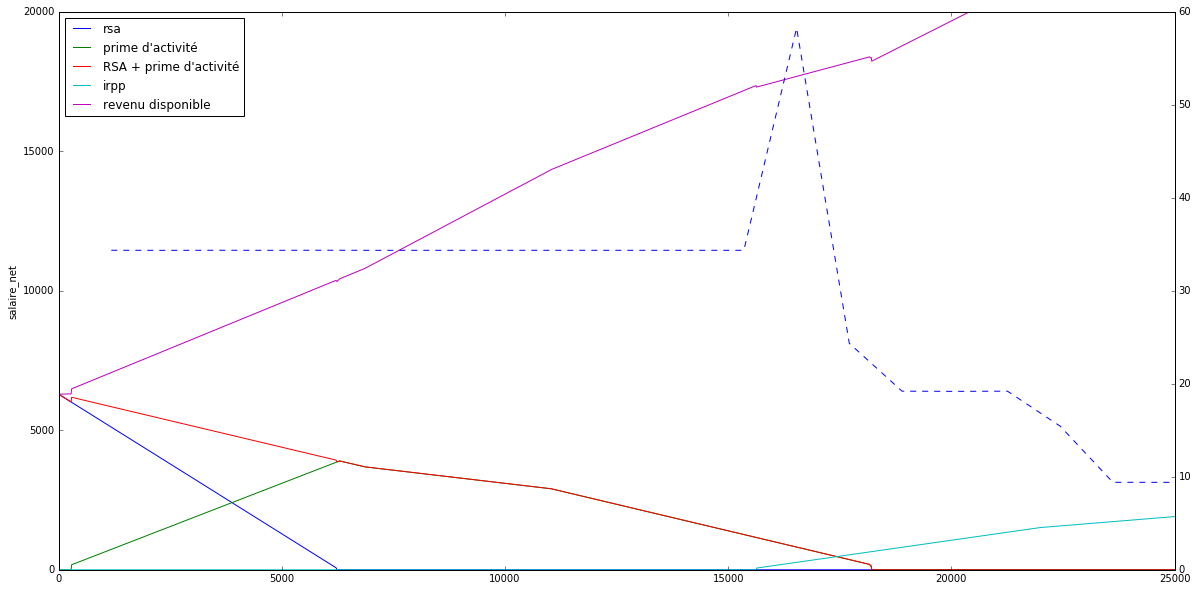

In [58]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(
         simulation.calculate_add("salaire_net"),
         simulation.calculate_add("rsa"), label = "rsa"
        )
ax.plot(simulation.calculate_add("salaire_net"),
         simulation.calculate_add("ppa"), label = u"prime d'activité"
        )

ax.plot(simulation.calculate_add("salaire_net"),
         simulation.calculate_add("rsa") + simulation.calculate_add("ppa"),
         label = u"RSA + prime d'activité"
        )
ax.plot(simulation.calculate_add("salaire_net"),
         -simulation.calculate_add("irpp"),
         label = u"irpp"
        )

# Tax rate
 ## Marginal Tax rate
ax2 = ax.twinx()

smooth = 101
ax2.plot(simulation_2005.calculate_add("salaire_net")[smooth::smooth],
        (
        rates.marginal_rate(simulation_2005.calculate_add("revdisp")[::smooth],
        simulation_2005.calculate("salaire_net")[::smooth])
        )*100,
        '--',
        label = "2005 marginal tax rate",
    )


ax.plot(simulation.calculate_add("salaire_net"),simulation.calculate_add("revdisp"), label = "revenu disponible")
ax.set_xlim(0,25000)
ax.set_ylim(0,20000)
ax.legend(loc = 2); ax.set_ylabel('euros'); ax.set_ylabel('salaire_net');

In [61]:
def make_single_with_child_scenario(nombre_enfants = 0, year = None, tax_benefit_system = tax_benefit_system,
                                    axes_variable = 'salaire_de_base',  ax_variable_max = 300000, ax_variable_min = 0,
                                    count = 20000):
    enfant = [dict(
        age = 12,
        )]
    enfants = enfant * nombre_enfants
    scenario = tax_benefit_system.new_scenario().init_single_entity(
        axes = [[
            dict(
                count = count,
                min = ax_variable_min,
                max = ax_variable_max,
                name = axes_variable,
                period = year-2,
                ),
            dict(
                count = count,
                min = ax_variable_min,
                max = ax_variable_max,
                name = axes_variable,
                period = year-1,
                ),
            dict(
                count = count,
                min = ax_variable_min,
                max = ax_variable_max,
                name = axes_variable,
                period = year,
                ),
            ]],
        period = year,
        parent1 = dict(
            age = 40,
            ppe_du_sa = 6020,
            ),
        enfants = enfants,
        menage = dict(
            loyer = 1000,
            statut_occupation_logement = 4,
            ),
        )
    return scenario
simulation = make_single_with_child_scenario(year = 2016).new_simulation()

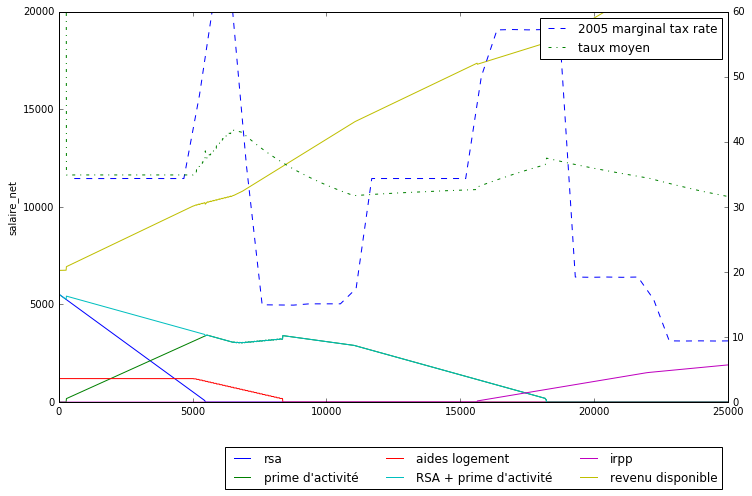

In [124]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(
         simulation.calculate_add("salaire_net"),
         simulation.calculate_add("rsa"), label = "rsa"
        )
ax.plot(simulation.calculate_add("salaire_net"),
         simulation.calculate_add("ppa"), label = u"prime d'activité"
        )

ax.plot(simulation.calculate_add("salaire_net"),
         simulation.calculate_add("aides_logement"), label = u"aides logement"
        )


ax.plot(simulation.calculate_add("salaire_net"),
         simulation.calculate_add("rsa") + simulation.calculate_add("ppa"),
         label = u"RSA + prime d'activité"
        )
ax.plot(simulation.calculate_add("salaire_net"),
         -simulation.calculate_add("irpp"),
         label = u"irpp"
        )

# Tax rate
 ## Marginal Tax rate
ax2 = ax.twinx()

smooth = 50
ax2.plot(simulation_2005.calculate_add("salaire_net")[smooth::smooth],
        (
        rates.marginal_rate(simulation.calculate_add("revdisp")[::smooth],
        simulation.calculate("salaire_net")[::smooth])
        )*100,
        '--',
        label = "2005 marginal tax rate",
    )


ax2.plot(simulation.calculate_add("salaire_net"),
        (
        (rates.average_rate(simulation.calculate_add("revdisp")-simulation.calculate_add("revdisp")[0],
        simulation_2006.calculate("salaire_net")))
        )*100,
         "g-.",
         label = "taux moyen",
    )    






ax.plot(simulation.calculate_add("salaire_net"),simulation.calculate_add("revdisp"), label = "revenu disponible")
ax.set_xlim(0,25000)
ax.set_ylim(0,20000)
ax.legend(bbox_to_anchor = (1,-0.1), ncol = 3); ax.set_ylabel('euros'); ax.set_ylabel('salaire_net');

ax2.set_ylim(0,60)
ax2.legend()

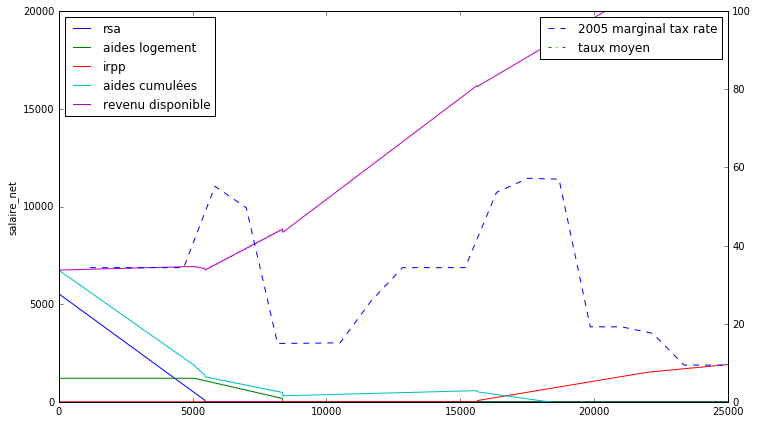

In [88]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(
         simulation.calculate_add("salaire_net"),
         simulation.calculate_add("rsa"), label = "rsa"
        )

ax.plot(simulation.calculate_add("salaire_net"),
         simulation.calculate_add("aides_logement"), label = u"aides logement"
        )


ax.plot(simulation.calculate_add("salaire_net"),
         -simulation.calculate_add("irpp"),
         label = u"irpp"
        )

ax.plot(simulation.calculate_add("salaire_net"),
         simulation.calculate_add("revdisp")-simulation.calculate("salaire_net")- simulation.calculate("ppa"),
         label = u"aides cumulées"
        )

# Tax rate
 ## Marginal Tax rate
ax2 = ax.twinx()

smooth = 100
ax2.plot(simulation.calculate_add("salaire_net")[smooth::smooth],
        (
        rates.marginal_rate(
            (simulation.calculate_add("revdisp"))[::smooth],
            simulation.calculate("salaire_net")[::smooth])
        )*100,
        '--',
        label = "2005 marginal tax rate",
    )

ax2.plot(simulation.calculate_add("salaire_net"),
        (
        1-rates.average_rate(-simulation.calculate_add("revdisp"),
        simulation_2006.calculate("salaire_net"))
        )*100,
         "g-.",
         label = "taux moyen",
    )    




ax.plot(simulation.calculate_add("salaire_net"),
        simulation.calculate_add("revdisp")-simulation.calculate_add("ppa"),
        label = "revenu disponible")
ax.set_xlim(0,25000)
ax.set_ylim(0,20000)
ax.legend(loc = 2); ax.set_ylabel('euros'); ax.set_ylabel('salaire_net');
ax2.set_ylim(0,100)
ax2.legend()

# Fin

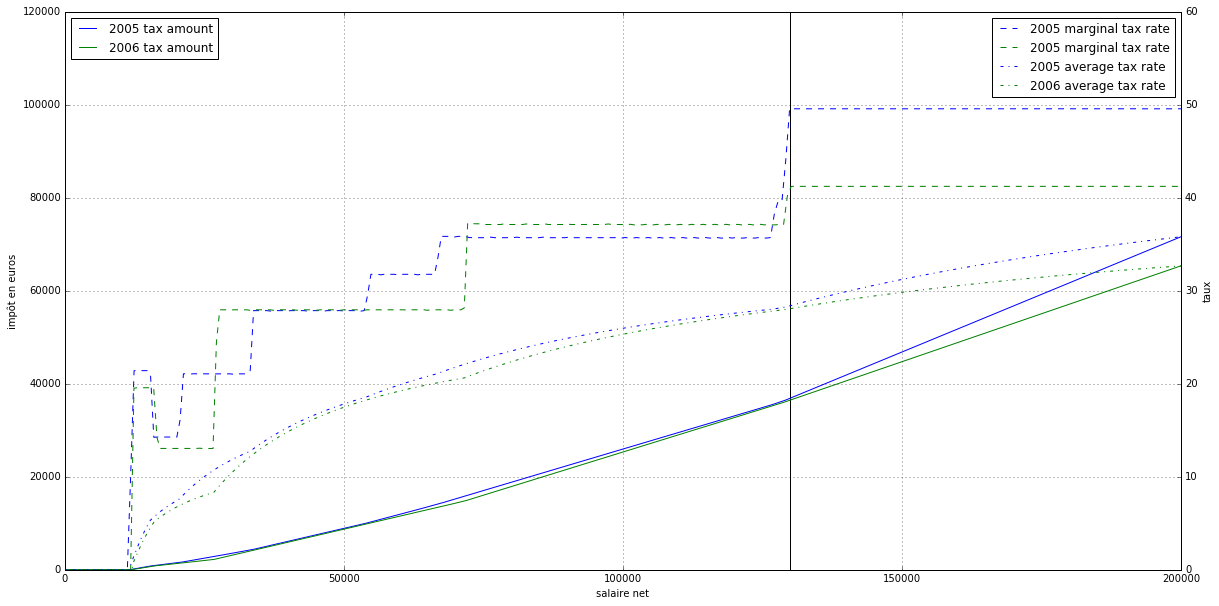

In [138]:
#ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(20, 10))


# Tax amount
ax.plot(
        simulation_2005.calculate_add("salaire_net"),
        -simulation_2005.calculate("impo"),
        label = "2005 tax amount",
    
    )
ax.plot(simulation_2006.calculate_add("salaire_net"),
       -simulation_2006.calculate("impo"),
        label = "2006 tax amount",
       )


# Tax rate
 ## Marginal Tax rate
ax2 = ax.twinx()

smooth = 50
ax2.plot(simulation_2005.calculate_add("salaire_net")[smooth::smooth],
        (
        1-rates.marginal_rate(-simulation_2005.calculate_add("impo")[::smooth],
        simulation_2005.calculate("salaire_net")[::smooth])
        )*100,
        '--',
        label = "2005 marginal tax rate",
    )

ax2.plot(simulation_2006.calculate_add("salaire_net")[smooth::smooth],
        (
        1-rates.marginal_rate(-simulation_2006.calculate_add("impo")[::smooth],
        simulation_2006.calculate("salaire_net")[::smooth])
        )*100,
        '--',
        label = "2005 marginal tax rate",
    )

 ## Average tax rate

    
    
ax2.plot(simulation_2005.calculate_add("salaire_net"),
        (
        1-rates.average_rate(-simulation_2005.calculate_add("impo"),
        simulation_2005.calculate("salaire_net"))
        )*100,
         "b-.",
         label = "2005 average tax rate",
    )

ax2.plot(simulation_2006.calculate_add("salaire_net"),
        (
        1-rates.average_rate(-simulation_2006.calculate_add("impo"),
        simulation_2006.calculate("salaire_net"))
        )*100,
         "g-.",
         label = "2006 average tax rate",
    )    
    


ax.set_xlabel("salaire net")
ax.set_ylabel(u"impôt en euros")
ax.set_xlim(0,200000)
ax.vlines(x=130000, ymin = 0 , ymax = 120000)
ax.legend(loc = 2)
ax.grid()

ax2.set_ylabel(u"taux")
ax2.set_xlim(0,200000)
ax2.set_ylim(0,60)
ax2.legend()

133444.444444


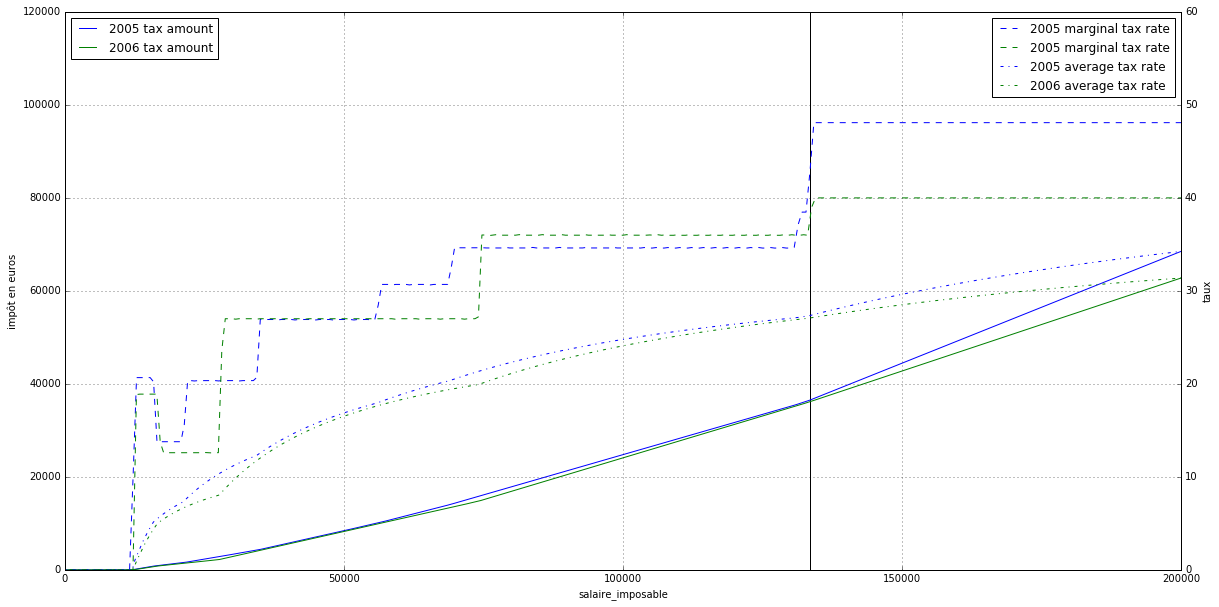

In [159]:
salaire = "salaire_imposable"

#ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(20, 10))


# Tax amount
ax.plot(
        simulation_2005.calculate_add(salaire),
        -simulation_2005.calculate("impo"),
        label = "2005 tax amount",
    
    )
ax.plot(simulation_2006.calculate_add(salaire),
       -simulation_2006.calculate("impo"),
        label = "2006 tax amount",
       )


# Tax rate
 ## Marginal Tax rate
ax2 = ax.twinx()

smooth = 50
ax2.plot(simulation_2005.calculate_add(salaire)[smooth::smooth],
        (
        1-rates.marginal_rate(-simulation_2005.calculate_add("impo")[::smooth],
        simulation_2005.calculate(salaire)[::smooth])
        )*100,
        '--',
        label = "2005 marginal tax rate",
    )

ax2.plot(simulation_2006.calculate_add(salaire)[smooth::smooth],
        (
        1-rates.marginal_rate(-simulation_2006.calculate_add("impo")[::smooth],
        simulation_2006.calculate(salaire)[::smooth])
        )*100,
        '--',
        label = "2005 marginal tax rate",
    )

 ## Average tax rate

    
    
ax2.plot(simulation_2005.calculate_add(salaire),
        (
        1-rates.average_rate(-simulation_2005.calculate_add("impo"),
        simulation_2005.calculate(salaire))
        )*100,
         "b-.",
         label = "2005 average tax rate",
    )

ax2.plot(simulation_2006.calculate_add(salaire),
        (
        1-rates.average_rate(-simulation_2006.calculate_add("impo"),
        simulation_2006.calculate(salaire))
        )*100,
         "g-.",
         label = "2006 average tax rate",
    )    
    


ax.set_xlabel(salaire)
ax.set_ylabel(u"impôt en euros")
ax.set_xlim(0,200000)
ax.vlines(x=120100*(1/0.9), ymin = 0 , ymax = 120000)
ax.legend(loc = 2)
ax.grid()

ax2.set_ylabel(u"taux")
#ax2.set_xlim(10000,200000)
ax2.set_ylim(0,60)
ax2.legend()
print 120100*(1/0.9)

In [150]:
scenario_2005 = make_single_with_child_scenario(year = 2005, count =2,
                                                ax_variable_max = 170000, ax_variable_min = 140000
                                                
                    )

In [151]:
print get_trace_tool_link(scenario_2005, ['irpp'], "http://api.openfisca.fr/", "http://www.openfisca.fr/tools/trace")

http://www.openfisca.fr/tools/trace?api_url=http%3A%2F%2Fapi.openfisca.fr%2F&simulation=%7B%22scenarios%22%3A+%5B%7B%22axes%22%3A+%5B%5B%7B%22count%22%3A+2%2C+%22index%22%3A+0%2C+%22name%22%3A+%22salaire_de_base%22%2C+%22min%22%3A+140000%2C+%22max%22%3A+170000%2C+%22period%22%3A+%5B%22year%22%2C+%5B2003%2C+1%2C+1%5D%2C+1%5D%7D%2C+%7B%22count%22%3A+2%2C+%22index%22%3A+0%2C+%22name%22%3A+%22salaire_de_base%22%2C+%22min%22%3A+140000%2C+%22max%22%3A+170000%2C+%22period%22%3A+%5B%22year%22%2C+%5B2004%2C+1%2C+1%5D%2C+1%5D%7D%2C+%7B%22count%22%3A+2%2C+%22index%22%3A+0%2C+%22name%22%3A+%22salaire_de_base%22%2C+%22min%22%3A+140000%2C+%22max%22%3A+170000%2C+%22period%22%3A+%5B%22year%22%2C+%5B2005%2C+1%2C+1%5D%2C+1%5D%7D%5D%5D%2C+%22period%22%3A+%222005%22%2C+%22test_case%22%3A+%7B%22familles%22%3A+%5B%7B%22id%22%3A+0%2C+%22parents%22%3A+%5B%22ind0%22%5D%7D%5D%2C+%22foyers_fiscaux%22%3A+%5B%7B%22id%22%3A+0%2C+%22declarants%22%3A+%5B%22ind0%22%5D%7D%5D%2C+%22individus%22%3A+%5B%7B%22id%22%3A+%22i